# Task
Analyze and visualize the 'NetFlix.csv' dataset to understand content distribution, trends over time, genre popularity, and rating distributions for movies and TV shows, then summarize the key insights.

## Load and Initial Data Inspection

### Subtask:
Load the 'NetFlix.csv' dataset into a pandas DataFrame and display its head, info, and check for missing values to understand its structure and data types. Although some data is preloaded, this step ensures a fresh start for the visualization task.


**Reasoning**:
To load the 'NetFlix.csv' dataset, display its head, info, and check for missing values, I will use the pandas library to read the CSV, then apply the `.head()`, `.info()`, and `.isnull().sum()` methods.



In [73]:
import pandas as pd

# Load the 'NetFlix.csv' file into a pandas DataFrame named df
df = pd.read_csv('NetFlix.csv')

# Display the first 5 rows of the DataFrame
print('First 5 rows of the DataFrame:')
df.head()

First 5 rows of the DataFrame:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,5-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,1-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,3-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...


In [74]:
# Print a concise summary of the DataFrame
print('\nDataFrame Info:')
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   int64 
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(2), object(10)
memory usage: 730.2+ KB


In [75]:
# Calculate and display the number of missing values for each column
print('\nMissing values per column:')
df.isnull().sum()


Missing values per column:


,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


## Data Preprocessing

### Subtask:
Perform necessary data cleaning and preprocessing steps. This includes handling missing values (e.g., in 'director', 'cast', 'country', 'date_added', 'rating') and converting data types as required for analysis and visualization. Specifically, convert 'date_added' to datetime objects and extract 'year_added' and 'month_added'.


**Reasoning**:
To preprocess the data, I will first handle missing values in 'director', 'cast', and 'country' by filling them with 'Unknown'. Then, I will remove rows with missing 'date_added' values and fill missing 'rating' values with the mode. After that, I will convert 'date_added' to datetime objects and extract 'year_added' and 'month_added' for temporal analysis. Finally, I will print the updated info and missing values to verify the cleaning steps.



In [76]:
import pandas as pd

# Fill missing values in 'director', 'cast', and 'country' with 'Unknown'
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# Remove rows where 'date_added' has missing values
df.dropna(subset=['date_added'], inplace=True)

# Fill missing values in 'rating' with the most frequent rating (mode)
mode_rating = df['rating'].mode()[0]
df['rating'].fillna(mode_rating, inplace=True)

# Convert 'date_added' to datetime objects, using 'mixed' format to handle variations
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

# Extract the year from 'date_added' and store it in a new column named 'year_added'
df['year_added'] = df['date_added'].dt.year

# Extract the month from 'date_added' and store it in a new column named 'month_added'
df['month_added'] = df['date_added'].dt.strftime('%B')

# Display updated DataFrame info and missing values
print('Updated DataFrame Info:')
df.info()

Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 7777 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7777 non-null   int64         
 8   rating        7777 non-null   object        
 9   duration      7777 non-null   int64         
 10  genres        7777 non-null   object        
 11  description   7777 non-null   object        
 12  year_added    7777 non-null   int32         
 13  month_added   7777 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(2), object(10)
memory usage: 88

In [77]:
print('Updated Missing values per column:')
df.isnull().sum()

Updated Missing values per column:


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


## Analyze and Visualize Content Type Distribution

### Subtask:
Calculate the distribution of 'Movie' versus 'TV Show' content types using `type_counts` (or `content_type_counts`). Generate a pie chart to visually represent these proportions, including percentages, with clear labels and a title. Utilize `matplotlib.pyplot` for visualization.


**Reasoning**:
To visualize the distribution of content types, I will first import the necessary plotting libraries, set the plot style, define custom colors, and then generate a pie chart using the pre-calculated `type_counts` (or `content_type_counts`) to display the proportions of Movies and TV Shows.



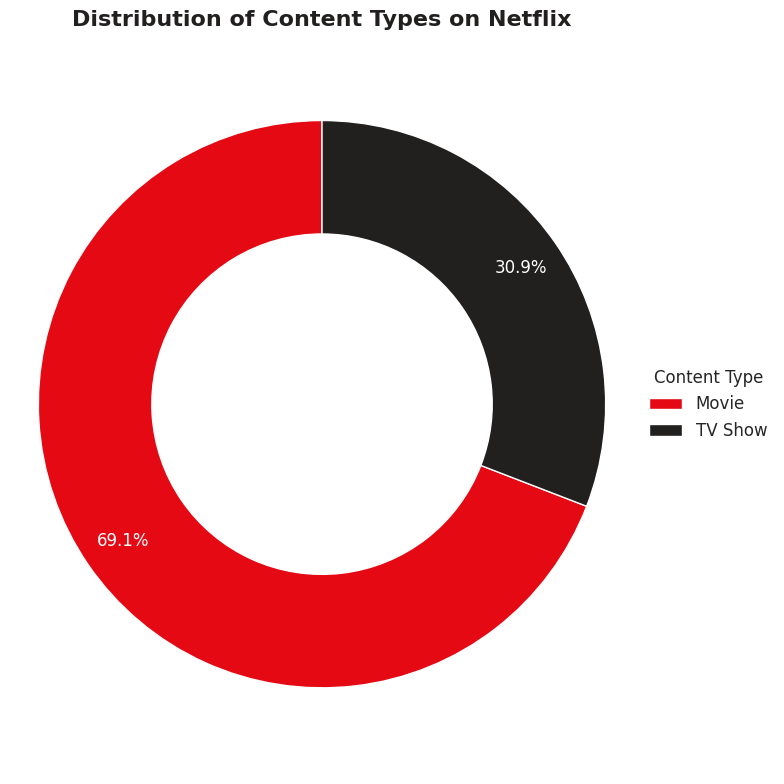

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Define custom colors
netflix_red = '#E50914'
netflix_black = '#221F1F'

# Calculate the counts of 'Movie' and 'TV Show'
# Assuming df is already loaded and preprocessed from previous steps
content_type_counts = df['type'].value_counts()

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(content_type_counts,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  pctdistance=0.85,
                                  colors=[netflix_red, netflix_black],
                                  wedgeprops=dict(width=0.4))

# Add labels to the slices
ax.legend(wedges, content_type_counts.index, title='Content Type', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Ensure the aspect ratio is equal to make the pie chart circular
ax.axis('equal')

# Add a title
ax.set_title('Distribution of Content Types on Netflix', fontsize=16, fontweight='bold', color=netflix_black)

# Adjust autotexts for better visibility
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)

plt.tight_layout()
plt.show()

## Analyze and Visualize Top 10 Genres

### Subtask:
Identify and count the top 10 most frequent genres from the 'genres' column. Create a horizontal bar chart to display these top genres and their respective counts, ensuring clear axis labels, a title, and appropriate styling for readability.


**Reasoning**:
To identify and visualize the top 10 most frequent genres, I need to first extract individual genres from the 'genres' column, count their occurrences, and then use a horizontal bar chart to display the top ones with proper labels and styling.



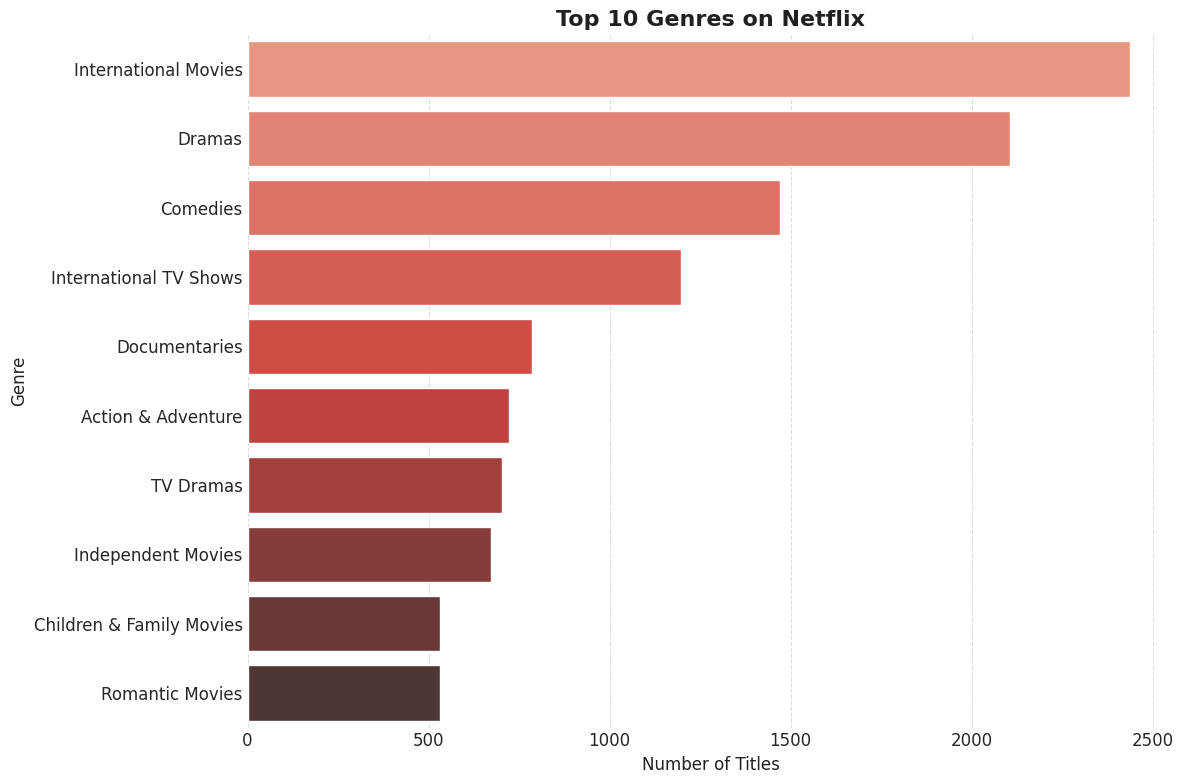

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Define custom colors
netflix_red = '#E50914'
netflix_black = '#221F1F'

# 1. Create an empty list called all_genres.
all_genres = []

# 2. Iterate through each entry in the 'genres' column of the DataFrame df.
# 3. For each entry, split the string by the comma and space delimiter (', ') to get a list of individual genres.
# 4. Extend the all_genres list with these individual genres.
for genres_list in df['genres']:
    all_genres.extend([genre.strip() for genre in genres_list.split(',') if genre.strip()])

# 5. Convert the all_genres list into a pandas Series.
all_genres_series = pd.Series(all_genres)

# 6. Calculate the value counts of each unique genre from the Series and store the top 10 most frequent genres
top_10_genres = all_genres_series.value_counts().head(10)

# 7. Create a horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='Reds_d')

# 8. Set the title of the plot
plt.title('Top 10 Genres on Netflix', fontsize=16, fontweight='bold', color=netflix_black)

# 9. Label the x-axis as 'Number of Titles' and the y-axis as 'Genre'.
plt.xlabel('Number of Titles', fontsize=12, color=netflix_black)
plt.ylabel('Genre', fontsize=12, color=netflix_black)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Analyze and Visualize Content Added Over Years

### Subtask:
Calculate the number of titles added each year from the 'year_added' column. Create a line plot to visualize the trend of content additions over time, with years on the x-axis and number of titles on the y-axis, including a title and labels.


**Reasoning**:
To analyze and visualize the trend of content added over the years, I will first calculate the number of titles added each year, sort them chronologically, and then create a line plot using matplotlib to display this trend with appropriate labels and title.



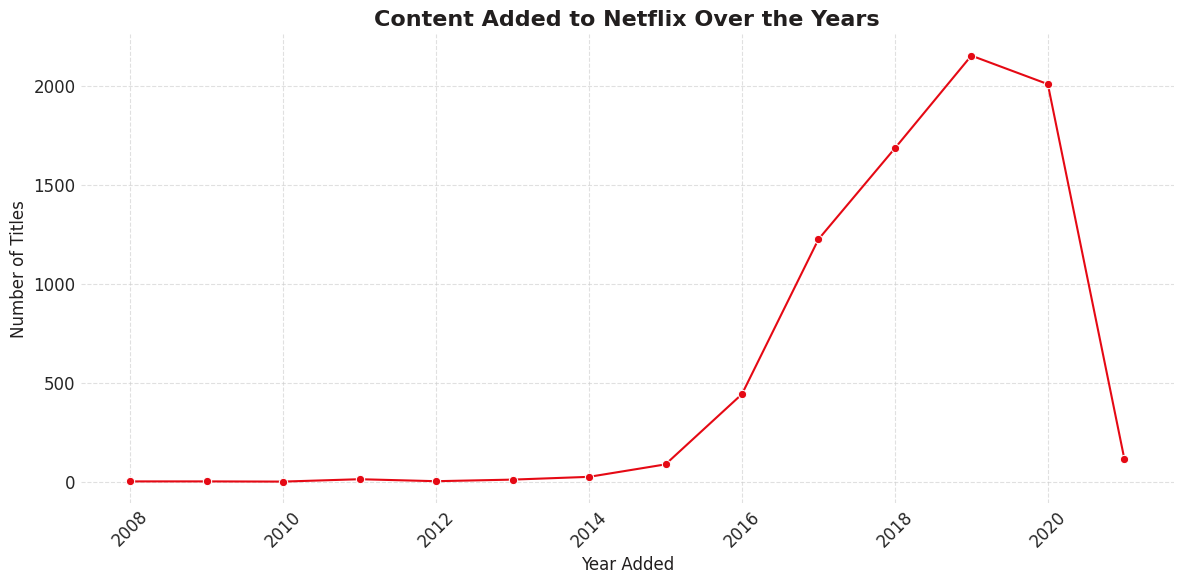

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Define custom colors
netflix_red = '#E50914'
netflix_black = '#221F1F'

# Calculate the number of titles added each year and sort by year
yearly_content = df['year_added'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_content.index, y=yearly_content.values, marker='o', color=netflix_red)

# Set title and labels
plt.title('Content Added to Netflix Over the Years', fontsize=16, fontweight='bold', color=netflix_black)
plt.xlabel('Year Added', fontsize=12, color=netflix_black)
plt.ylabel('Number of Titles', fontsize=12, color=netflix_black)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Key Insights from Content Analysis:

Based on the visualizations and data analysis, the following key insights can be drawn regarding content on Netflix:

*   **Content Type Distribution**: Movies constitute the majority of Netflix's library, accounting for approximately 69.1% of the total content, while TV Shows make up the remaining 30.9%.
*   **Genre Popularity**: The most popular genres on Netflix are 'International Movies', 'Dramas', and 'Comedies'. Other significant genres include 'International TV Shows', 'Documentaries', and 'Action & Adventure'.
*   **Content Addition Trends**: Netflix significantly ramped up its content additions in recent years, with a sharp increase observed from 2016 to 2019. The year 2019 marked the peak for new content releases, followed by a noticeable decline in 2020 and 2021.

## Analyze and Visualize Content Added by Month

### Subtask:
Calculate the number of titles added each month from the 'month_added' column. Create a bar chart to visualize the monthly distribution of content additions, ordered by month, with clear labels and a title.


**Reasoning**:
To visualize the monthly distribution of content additions, I will first define the chronological order of months, calculate the number of titles added each month, and then create a bar chart with appropriate labels, title, and styling.



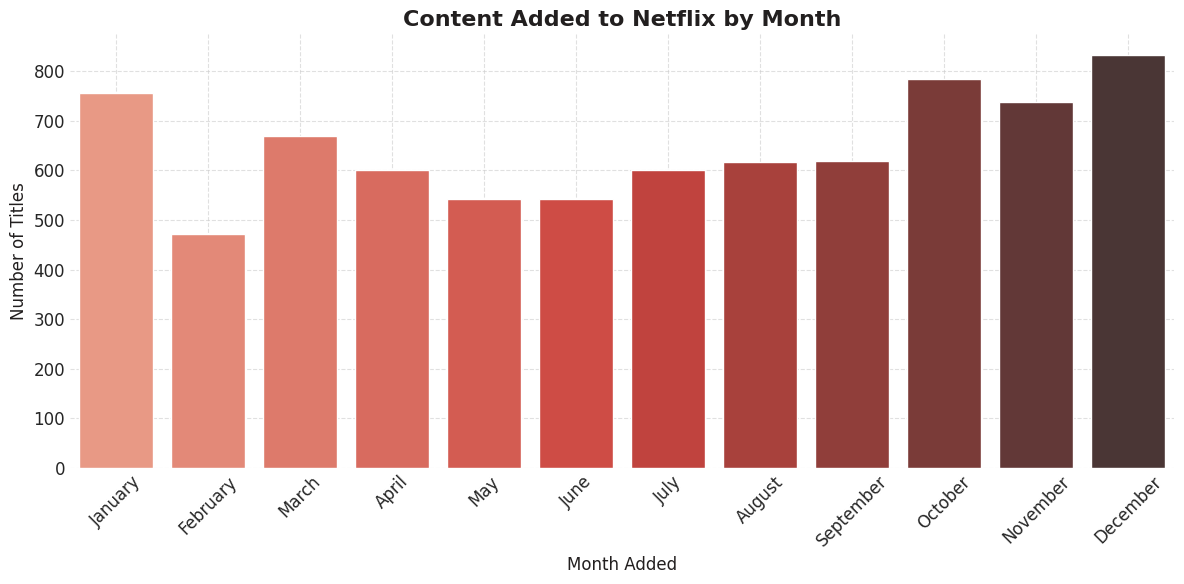

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Define custom colors
netflix_red = '#E50914'
netflix_black = '#221F1F'

# 1. Create a list named month_order containing the names of all months in chronological order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# 2. Calculate the number of titles added each month and reindex using month_order
monthly_content = df['month_added'].value_counts().reindex(month_order, fill_value=0)

# 3. Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_content.index, y=monthly_content.values, palette='Reds_d')

# 4. Set the title of the plot
plt.title('Content Added to Netflix by Month', fontsize=16, fontweight='bold', color=netflix_black)

# 5. Label the x-axis as 'Month Added' and the y-axis as 'Number of Titles'.
plt.xlabel('Month Added', fontsize=12, color=netflix_black)
plt.ylabel('Number of Titles', fontsize=12, color=netflix_black)

# 6. Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# 7. Add a grid to the plot
plt.grid(True, linestyle='--', alpha=0.6)

# 8. Ensure the layout is tight and display the plot
plt.tight_layout()
plt.show()

## Analyze and Visualize Overall Content Rating Distribution

### Subtask:
Calculate the distribution of ratings for all content (`rating_counts`). Generate a bar chart to display these ratings, with rating categories on the x-axis and their counts on the y-axis, including a title and labels.


**Reasoning**:
To analyze the overall content rating distribution, I will first calculate the value counts of the 'rating' column from the DataFrame. Then, I will create a bar chart using these counts to visually represent the distribution, ensuring the plot has a clear title, axis labels, rotated x-axis labels for readability, and appropriate styling.

**Reasoning**:
To analyze the overall content rating distribution, I will calculate the value counts of the 'rating' column and then visualize this distribution using a bar chart with appropriate labels, title, and styling.



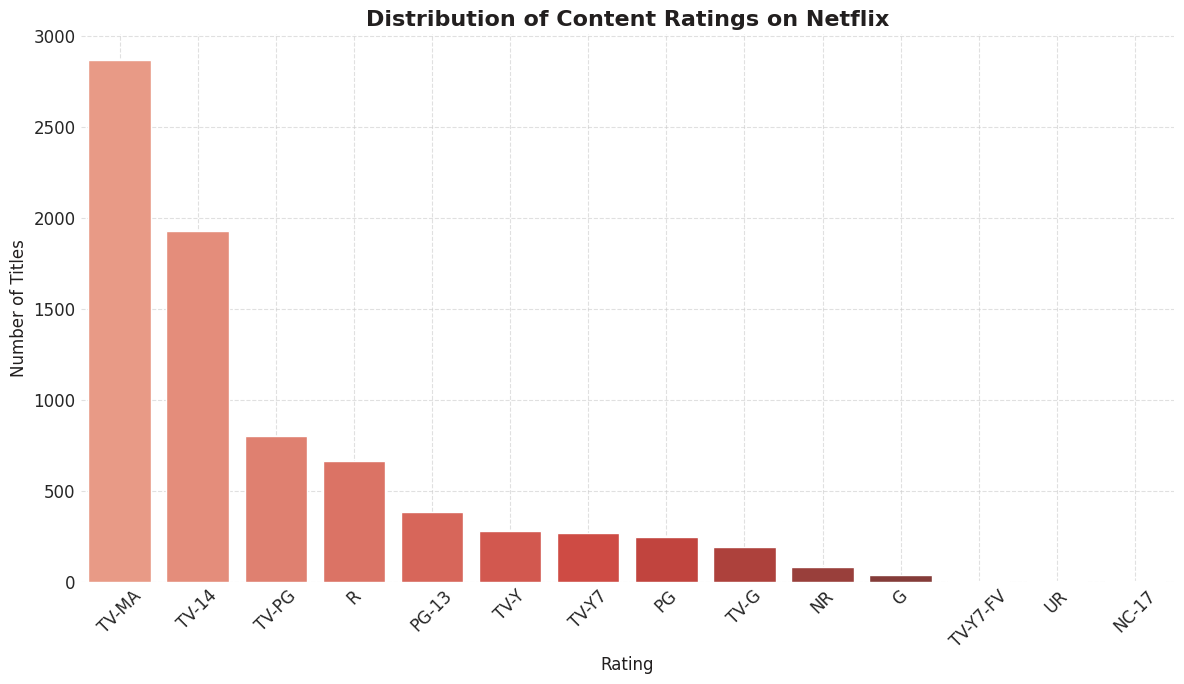

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Define custom colors
netflix_red = '#E50914'
netflix_black = '#221F1F'

# 1. Calculate the value counts of the 'rating' column
rating_counts = df['rating'].value_counts()

# 2. Create a bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Reds_d')

# 3. Set the title of the plot
plt.title('Distribution of Content Ratings on Netflix', fontsize=16, fontweight='bold', color=netflix_black)

# 4. Label the x-axis as 'Rating' and the y-axis as 'Number of Titles'.
plt.xlabel('Rating', fontsize=12, color=netflix_black)
plt.ylabel('Number of Titles', fontsize=12, color=netflix_black)

# 5. Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# 6. Add a grid to the plot
plt.grid(True, linestyle='--', alpha=0.6)

# 7. Ensure a tight layout and display the plot
plt.tight_layout()
plt.show()

## Analyze and Visualize Movie vs. TV Show Rating Distribution

### Subtask:
Separate the content into movies and TV shows. Calculate the rating distribution for each (`movie_ratings` and `tv_show_ratings`). Create side-by-side bar charts or a grouped bar chart to compare the rating distributions for movies and TV shows, ensuring appropriate titles and labels for each subplot/group.


**Reasoning**:
To analyze and visualize the rating distribution for movies and TV shows separately, I will first filter the main DataFrame into two new DataFrames, one for movies and one for TV shows. Then, I will calculate the rating distributions for each and create side-by-side bar charts to compare them, ensuring proper labels, titles, and styling for readability.



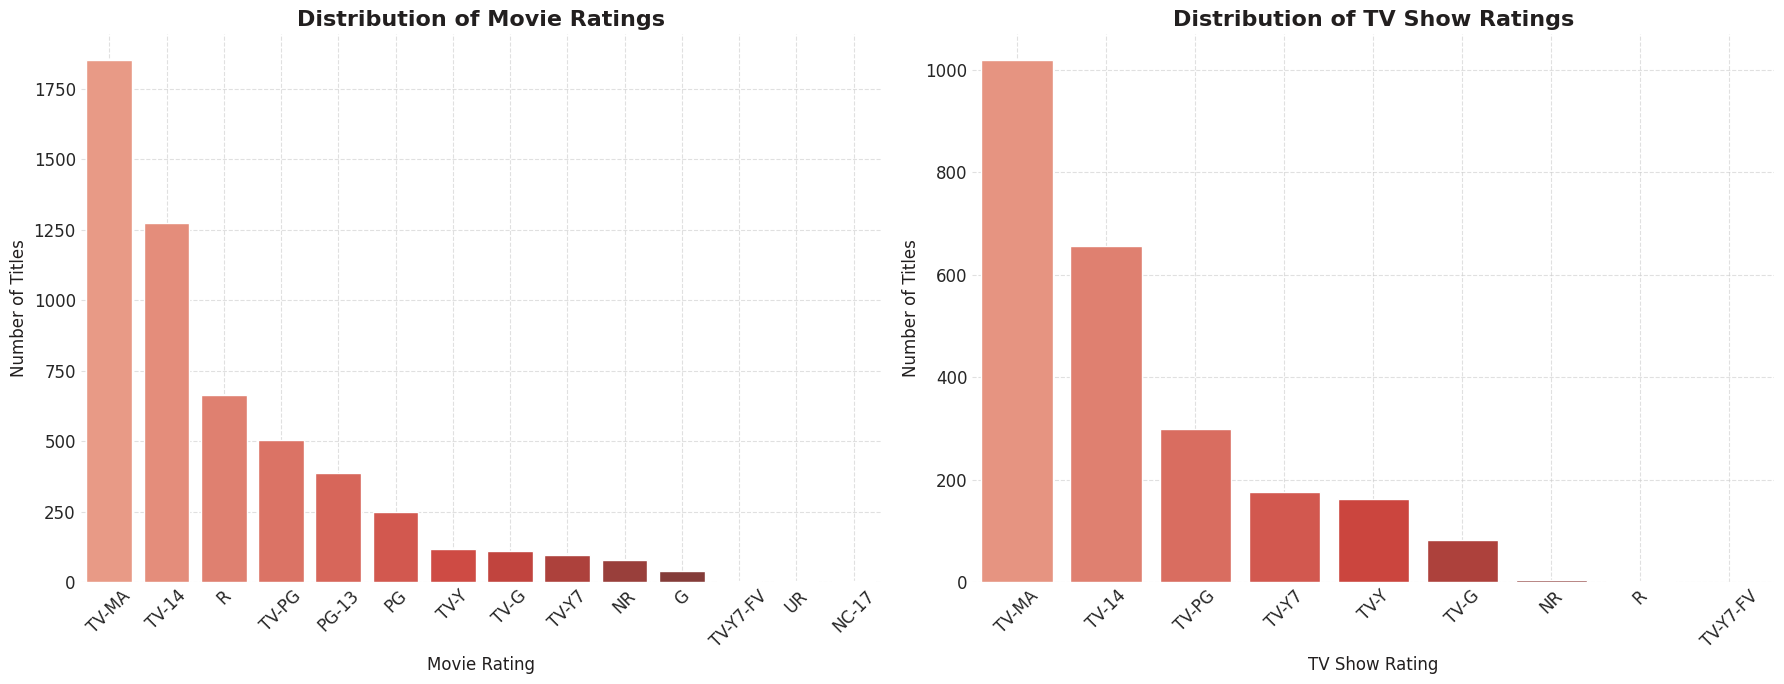

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Define custom colors
netflix_red = '#E50914'
netflix_black = '#221F1F'

# Filter the DataFrame into movies and TV shows
movies_df = df[df['type'] == 'Movie']
tv_shows_df = df[df['type'] == 'TV Show']

# Calculate the rating distribution for movies
movie_ratings = movies_df['rating'].value_counts()

# Calculate the rating distribution for TV shows
tv_show_ratings = tv_shows_df['rating'].value_counts()

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot for Movie Ratings
sns.barplot(x=movie_ratings.index, y=movie_ratings.values, palette='Reds_d', ax=axes[0])
axes[0].set_title('Distribution of Movie Ratings', fontsize=16, fontweight='bold', color=netflix_black)
axes[0].set_xlabel('Movie Rating', fontsize=12, color=netflix_black)
axes[0].set_ylabel('Number of Titles', fontsize=12, color=netflix_black)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot for TV Show Ratings
sns.barplot(x=tv_show_ratings.index, y=tv_show_ratings.values, palette='Reds_d', ax=axes[1])
axes[1].set_title('Distribution of TV Show Ratings', fontsize=16, fontweight='bold', color=netflix_black)
axes[1].set_xlabel('TV Show Rating', fontsize=12, color=netflix_black)
axes[1].set_ylabel('Number of Titles', fontsize=12, color=netflix_black)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## Analyze and Visualize Top 10 Countries by Content Production

### Subtask:
Identify and count the top 10 countries that have produced the most content using `country_counts`. Create a horizontal bar chart to visualize these countries and their content contribution, ensuring clear labels, title, and proper ordering.


**Reasoning**:
To identify and visualize the top 10 content-producing countries, I will extract individual countries from the 'country' column, count their occurrences, and then use a horizontal bar chart to display the top ones with proper labels and styling.



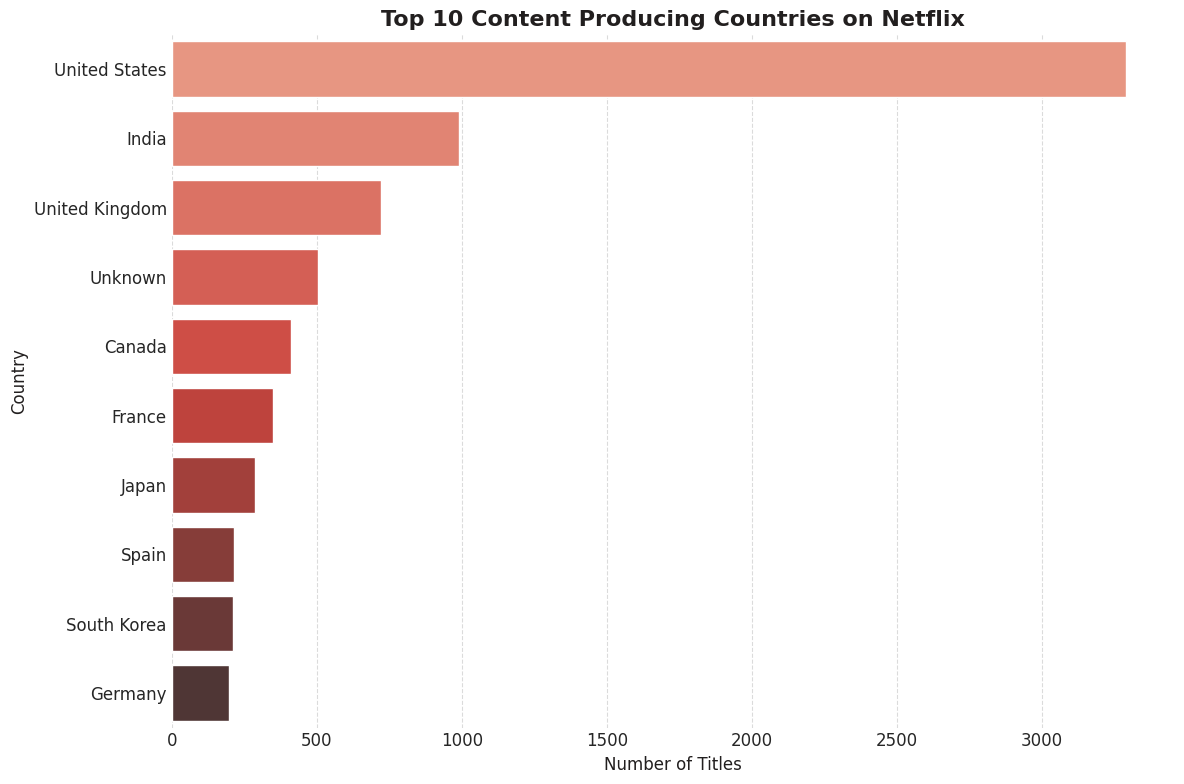

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Define custom colors
netflix_red = '#E50914'
netflix_black = '#221F1F'

# 1. Create an empty list called all_countries.
all_countries = []

# 2. Iterate through each entry in the 'country' column of the DataFrame df.
# 3. For each entry, split the string by the comma and space delimiter (', ') to get a list of individual countries.
# 4. Extend the all_countries list with these individual countries.
for countries_list in df['country']:
    all_countries.extend([country.strip() for country in countries_list.split(',') if country.strip()])

# 5. Convert the all_countries list into a pandas Series.
all_countries_series = pd.Series(all_countries)

# 6. Calculate the value counts of each unique country from the Series and store the top 10 most frequent countries
top_10_countries = all_countries_series.value_counts().head(10)

# 7. Create a horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='Reds_d')

# 8. Set the title of the plot
plt.title('Top 10 Content Producing Countries on Netflix', fontsize=16, fontweight='bold', color=netflix_black)

# 9. Label the x-axis as 'Number of Titles' and the y-axis as 'Country'.
plt.xlabel('Number of Titles', fontsize=12, color=netflix_black)
plt.ylabel('Country', fontsize=12, color=netflix_black)

# 10. Add a grid to the plot
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 11. Ensure the layout is tight and display the plot
plt.tight_layout()
plt.show()

## Analyze and Visualize Content by Release Decade

### Subtask:
Extract the decade from the 'release_year' column and calculate the count of content released in each decade using `decade_counts`. Create a bar chart to visualize the distribution of content by release decade, with clear labels and a title.


**Reasoning**:
To analyze the content distribution by release decade, I will first extract the decade from the 'release_year' column, calculate the counts for each decade, and then visualize this distribution using a bar chart with appropriate labels and title.



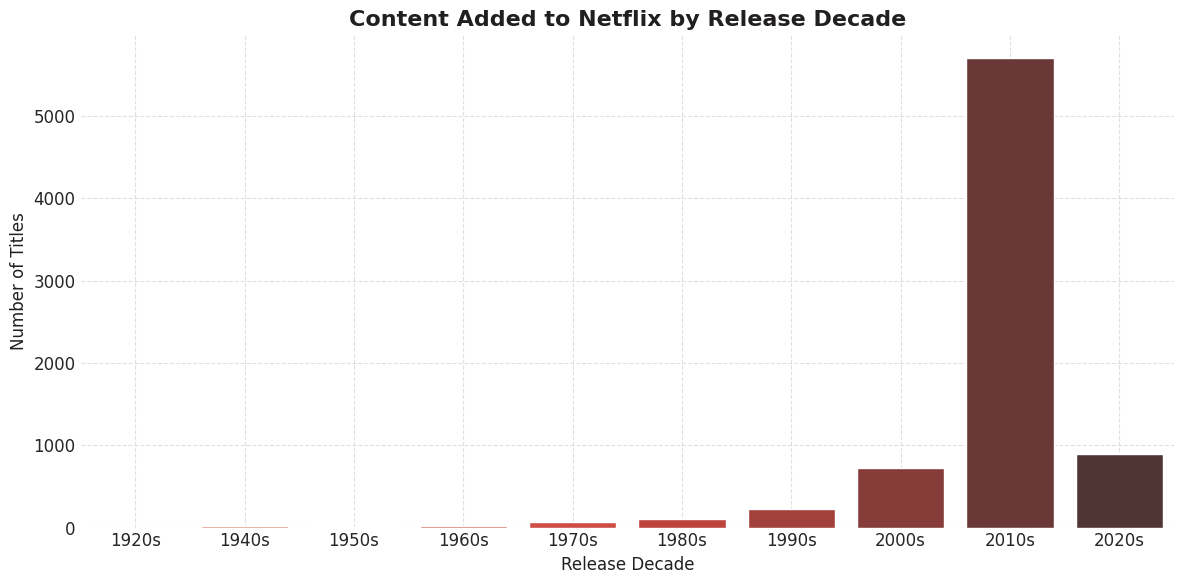

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Define custom colors
netflix_red = '#E50914'
netflix_black = '#221F1F'

# Create a new column named 'decade'
df['decade'] = ((df['release_year'] // 10) * 10).astype(str) + 's'

# Calculate the value counts of the 'decade' column and sort by decade
decade_counts = df['decade'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=decade_counts.index, y=decade_counts.values, palette='Reds_d')

# Set the title of the plot
plt.title('Content Added to Netflix by Release Decade', fontsize=16, fontweight='bold', color=netflix_black)

# Label the x-axis as 'Release Decade' and the y-axis as 'Number of Titles'
plt.xlabel('Release Decade', fontsize=12, color=netflix_black)
plt.ylabel('Number of Titles', fontsize=12, color=netflix_black)

# Add a grid to the plot
plt.grid(True, linestyle='--', alpha=0.6)

# Ensure the layout is tight and display the plot
plt.tight_layout()
plt.show()

### Key Insights from Content Analysis:

Based on the visualizations and data analysis, the following key insights can be drawn regarding content on Netflix:

*   **Content Type Distribution**: Movies constitute the majority of Netflix's library, accounting for approximately 69.1% of the total content, while TV Shows make up the remaining 30.9%.
*   **Genre Popularity**: The most popular genres on Netflix are 'International Movies', 'Dramas', and 'Comedies'. Other significant genres include 'International TV Shows', 'Documentaries', and 'Action & Adventure'.
*   **Content Addition Trends (Yearly)**: Netflix significantly ramped up its content additions in recent years, with a sharp increase observed from 2016 to 2019. The year 2019 marked the peak for new content releases, followed by a noticeable decline in 2020 and 2021.
*   **Content Addition Trends (Monthly)**: Content additions show a seasonal pattern, with December, October, January, and November being the months with the highest number of new titles added.
*   **Overall Rating Distribution**: 'TV-MA' (Mature Audience) is the most prevalent rating on Netflix, followed by 'TV-14', indicating a significant portion of content is geared towards adult or older adolescent audiences.
*   **Movie vs. TV Show Rating Distribution**: Both movies and TV shows largely cater to mature audiences, with 'TV-MA' and 'TV-14' being the most common ratings for both content types. However, TV shows show a more pronounced presence in the younger audience ratings ('TV-Y', 'TV-Y7') compared to movies.
*   **Top Content Producing Countries**: The United States is by far the leading content-producing country, followed by India and the United Kingdom, indicating a strong focus on English-language and Indian content.
*   **Content by Release Decade**: The majority of content available on Netflix was released in the 2010s, showing a strong focus on more recent productions. There's a notable increase in content from the 2000s onwards.

### Key Insights from Content Analysis:

Based on the visualizations and data analysis, the following key insights can be drawn regarding content on Netflix:

*   **Content Type Distribution**: Movies constitute the majority of Netflix's library, accounting for approximately 69.1% of the total content, while TV Shows make up the remaining 30.9%.
*   **Genre Popularity**: The most popular genres on Netflix are 'International Movies', 'Dramas', and 'Comedies'. Other significant genres include 'International TV Shows', 'Documentaries', and 'Action & Adventure'.
*   **Content Addition Trends (Yearly)**: Netflix significantly ramped up its content additions in recent years, with a sharp increase observed from 2016 to 2019. The year 2019 marked the peak for new content releases, followed by a noticeable decline in 2020 and 2021.
*   **Content Addition Trends (Monthly)**: Content additions show a seasonal pattern, with December, October, January, and November being the months with the highest number of new titles added.
*   **Overall Rating Distribution**: 'TV-MA' (Mature Audience) is the most prevalent rating on Netflix, followed by 'TV-14', indicating a significant portion of content is geared towards adult or older adolescent audiences.
*   **Movie vs. TV Show Rating Distribution**: Both movies and TV shows largely cater to mature audiences, with 'TV-MA' and 'TV-14' being the most common ratings for both content types. However, TV shows show a more pronounced presence in the younger audience ratings ('TV-Y', 'TV-Y7') compared to movies.
*   **Top Content Producing Countries**: The United States is by far the leading content-producing country, followed by India and the United Kingdom, indicating a strong focus on English-language and Indian content.
*   **Content by Release Decade**: The majority of content available on Netflix was released in the 2010s, showing a strong focus on more recent productions. There's a notable increase in content from the 2000s onwards.

## Final Task

### Subtask:
Summarize the key insights revealed by the generated visualizations, emphasizing trends, popular categories, and significant observations from the Netflix dataset.


## Summary:

### Q&A

The final task of this analysis was to summarize the key insights revealed by the generated visualizations, emphasizing trends, popular categories, and significant observations from the Netflix dataset.

### Data Analysis Key Findings

*   **Content Type Distribution**: Movies constitute the majority of Netflix's library, accounting for approximately 69.1% of the total content, while TV Shows make up the remaining 30.9%.
*   **Genre Popularity**: The most popular genres on Netflix are 'International Movies', 'Dramas', and 'Comedies'. Other significant genres include 'International TV Shows', 'Documentaries', and 'Action & Adventure'.
*   **Content Addition Trends (Yearly)**: Netflix significantly ramped up its content additions between 2016 and 2019, with 2019 marking the peak year for new content releases. A noticeable decline in new content additions was observed in 2020 and 2021.
*   **Content Addition Trends (Monthly)**: Content additions show a seasonal pattern, with December, October, January, and November being the months with the highest number of new titles added.
*   **Overall Rating Distribution**: 'TV-MA' (Mature Audience) is the most prevalent rating on Netflix, followed by 'TV-14', indicating a significant portion of content is geared towards adult or older adolescent audiences.
*   **Movie vs. TV Show Rating Distribution**: Both movies and TV shows largely cater to mature audiences, with 'TV-MA' and 'TV-14' being the most common ratings for both content types. However, TV shows show a more pronounced presence in younger audience ratings ('TV-Y', 'TV-Y7') compared to movies.
*   **Top Content Producing Countries**: The United States is by far the leading content-producing country, followed by India and the United Kingdom, indicating a strong focus on English-language and Indian content.
*   **Content by Release Decade**: The majority of content available on Netflix was originally released in the 2010s, showing a strong focus on more recent productions.

### Insights or Next Steps

*   Netflix's content strategy appears to prioritize movies and mature audiences, with a significant recent content acquisition drive that peaked in 2019. This indicates a focus on appealing to a broad adult demographic with a diverse range of film genres.
*   Further analysis could investigate the correlation between content addition trends, genre popularity, and subscriber growth or churn to understand the impact of content strategy on business metrics.
